In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

### Formulate research Questions
**1.** Load the dataset and check the dataset structure

In [100]:
data = pd.read_csv('dataset.csv')

print(data.shape)

data.head()

(100000, 2)


,password,strength
0,yrtzuab476,1
1,yEdnN9jc1NgzkkBP,2
2,sarita99,1
3,Suramerica2015,2
4,PPRbMvDIxMQ19TMo,2


In [101]:
data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  100000 non-null  object
 1   strength  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


password    0
strength    0
dtype: int64

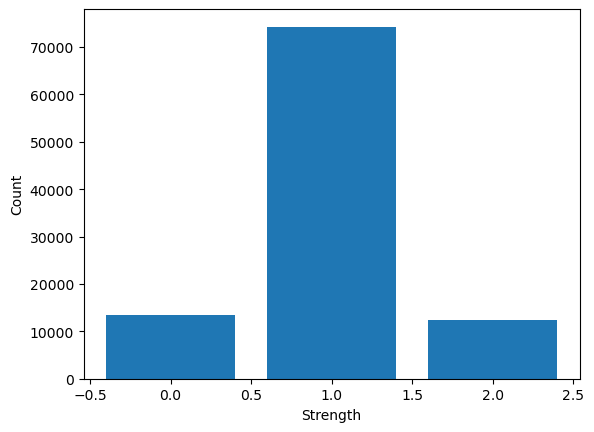

In [102]:
value_counts = data['strength'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Strength')
plt.ylabel('Count')
plt.show()

We can see that the data structure is very simple, the data labels are only two columns and there are no null values.

In this dataset, the highest rating of password strength is 2 and the lowest rating is 0. The outliers in the dataset can be found by finding the number of columns 'strength' that are greater than 2 and less than 0.

In [103]:
outliers = any((data['strength'] > 2) | (data['strength'] < 0))
print(outliers)

False


Since there are no nulls or outliers in the dataset, the data cleaning process can be skipped.

In this worksheet, the research objective is to determine the strength of the password, we need to find the features in the password that can affect the strength, in this step, these features can be obtained by splitting the information in the password part of the dataset

### Analyse password features



In [104]:
def digits_number(password: str):
    return sum(c.isdigit() for c in password)

def lower_letters(password: str):
    return sum(c.islower() for c in password)

def upper_letters(password: str):
    return sum(c.isupper() for c in password)

def special_chars(password: str):
    return sum(not c.isalnum() for c in password)

def password_length(password: str):
    return len(password)

data_features = data.copy()

data_features = data_features.password.agg([password_length, digits_number, lower_letters, upper_letters, special_chars])
data_features['level'] = data['strength']

print(data_features.shape)
data_features.head()

(100000, 6)


,password_length,digits_number,lower_letters,upper_letters,special_chars,level
0,10,3,7,0,0,1
1,16,2,9,5,0,2
2,8,2,6,0,0,1
3,14,4,9,1,0,2
4,16,2,4,10,0,2


In [105]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   password_length  100000 non-null  int64
 1   digits_number    100000 non-null  int64
 2   lower_letters    100000 non-null  int64
 3   upper_letters    100000 non-null  int64
 4   special_chars    100000 non-null  int64
 5   level            100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [106]:
features = data_features.drop('level', axis=1)
target = data_features['level']

def score_model(features, target, model, scoring='f1_macro'):
    scores = cross_val_score(model, features, target, cv=5, scoring=scoring)
    return scores.mean()

In [107]:
score = score_model(features, target, SGDClassifier())
print(f'F1 macro у SGDClassifier = {score}')

F1 macro у SGDClassifier = 0.9953714051019942


In [108]:
score = score_model(features, target, RandomForestClassifier())
print(f'F1 macro у RandomForestClassifier = {score}')

F1 macro у RandomForestClassifier = 1.0
